In [167]:
import pandas as pd

In [168]:
gmt = -3
cdr = pd.read_csv('input/cdr-sample.csv')

In [169]:
cdr.describe()

,src,dst,duration,billsec,amaflags,accountcode,uniqueid,userfield
count,3.000000e+01,3.000000e+01,30.000000,30.000000,30.0,0.0,3.000000e+01,0.0
mean,3.131570e+10,3.161630e+10,136.800000,114.733333,3.0,NaN,1.605724e+09,NaN
std,6.803534e+10,8.224434e+10,179.172119,182.027647,0.0,NaN,4.260892e+03,NaN
min,2.000000e+03,1.012000e+03,6.000000,0.000000,3.0,NaN,1.605712e+09,NaN
25%,3.333333e+08,1.111000e+03,25.500000,0.000000,3.0,NaN,1.605722e+09,NaN
50%,3.333333e+08,2.373829e+09,58.500000,16.000000,3.0,NaN,1.605724e+09,NaN
75%,2.222222e+10,2.373686e+10,191.000000,178.750000,3.0,NaN,1.605727e+09,NaN
max,2.244224e+11,3.434242e+11,813.000000,798.000000,3.0,NaN,1.605734e+09,NaN


In [170]:
cdr.head()

,calldate,clid,src,dst,dcontext,channel,dstchannel,lastapp,lastdata,duration,billsec,disposition,amaflags,accountcode,uniqueid,userfield
0,2020-11-18 21:11:10,"""22222222222"" <22222222222>",22222222222,1111,ext-group,SIP/333333333-0000126b,SIP/1000-0000126c,Dial,"SIP/1000&SIP/1011&SIP/1013,60,HhtrM(auto-blkvm...",51,0,NO ANSWER,3,NaN,1.605734e+09,NaN
1,2020-11-18 21:09:30,"""22222222222"" <22222222222>",22222222222,1111,ext-group,SIP/333333333-00001269,SIP/1000-0000126a,Dial,"SIP/1000&SIP/1011&SIP/1013,60,HhtrM(auto-blkvm...",52,0,NO ANSWER,3,NaN,1.605734e+09,NaN
2,2020-11-18 20:18:22,""""" <333333333>",333333333,2323423423,from-internal,SIP/1027-00001267,SIP/gvt-vox-00001268,Dial,"SIP/gvt-vox/0152323423423,300,Tb(func-apply-si...",380,370,ANSWERED,3,NaN,1.605731e+09,NaN
3,2020-11-18 19:38:34,""""" <333333333>",333333333,2234234,from-internal,SIP/1020-00001265,SIP/gvt-vox-00001266,Dial,"SIP/gvt-vox/2234234,300,Tb(func-apply-sipheade...",156,148,ANSWERED,3,NaN,1.605728e+09,NaN
4,2020-11-18 19:18:08,""""" <333333333>",333333333,53453434,from-internal,SIP/1020-00001263,SIP/gvt-vox-00001264,Dial,"SIP/gvt-vox/53453434,300,Tb(func-apply-siphead...",198,185,ANSWERED,3,NaN,1.605727e+09,NaN


In [171]:
cdr[['duration','billsec']].sum()

duration    4104
billsec     3442
dtype: int64

In [172]:
cdr['calldate'] = pd.to_datetime(cdr.calldate, format="%Y-%m-%d %H:%M:%S")
cdr.head()

,calldate,clid,src,dst,dcontext,channel,dstchannel,lastapp,lastdata,duration,billsec,disposition,amaflags,accountcode,uniqueid,userfield
0,2020-11-18 21:11:10,"""22222222222"" <22222222222>",22222222222,1111,ext-group,SIP/333333333-0000126b,SIP/1000-0000126c,Dial,"SIP/1000&SIP/1011&SIP/1013,60,HhtrM(auto-blkvm...",51,0,NO ANSWER,3,NaN,1.605734e+09,NaN
1,2020-11-18 21:09:30,"""22222222222"" <22222222222>",22222222222,1111,ext-group,SIP/333333333-00001269,SIP/1000-0000126a,Dial,"SIP/1000&SIP/1011&SIP/1013,60,HhtrM(auto-blkvm...",52,0,NO ANSWER,3,NaN,1.605734e+09,NaN
2,2020-11-18 20:18:22,""""" <333333333>",333333333,2323423423,from-internal,SIP/1027-00001267,SIP/gvt-vox-00001268,Dial,"SIP/gvt-vox/0152323423423,300,Tb(func-apply-si...",380,370,ANSWERED,3,NaN,1.605731e+09,NaN
3,2020-11-18 19:38:34,""""" <333333333>",333333333,2234234,from-internal,SIP/1020-00001265,SIP/gvt-vox-00001266,Dial,"SIP/gvt-vox/2234234,300,Tb(func-apply-sipheade...",156,148,ANSWERED,3,NaN,1.605728e+09,NaN
4,2020-11-18 19:18:08,""""" <333333333>",333333333,53453434,from-internal,SIP/1020-00001263,SIP/gvt-vox-00001264,Dial,"SIP/gvt-vox/53453434,300,Tb(func-apply-siphead...",198,185,ANSWERED,3,NaN,1.605727e+09,NaN


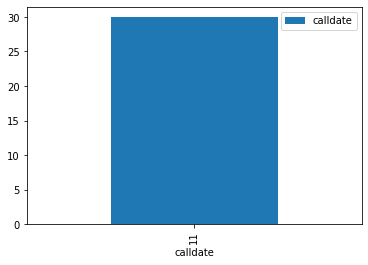

In [173]:
cdr[['calldate']].groupby(cdr["calldate"].dt.month).count().plot(kind="bar")

In [174]:
cdr = cdr.set_index('calldate')

In [175]:
cdr.dtypes

clid            object
src              int64
dst              int64
dcontext        object
channel         object
dstchannel      object
lastapp         object
lastdata        object
duration         int64
billsec          int64
disposition     object
amaflags         int64
accountcode    float64
uniqueid       float64
userfield      float64
dtype: object

### Organize calls per internal origin/external destination

In [176]:
cdr['channel2'] = cdr['channel'].str.slice(4,8)
cdr['dstchannel2'] = cdr['dstchannel'].str.slice(4,8)

In [177]:
answered_sent_cdr = cdr.loc[cdr['disposition'] == 'ANSWERED']
answered_sent_cdr = answered_sent_cdr.loc[answered_sent_cdr['dcontext'] == 'from-internal']
answered_sent_cdr['origin'] = answered_sent_cdr['channel2']
answered_sent_cdr['destination'] = answered_sent_cdr['dst']
answered_sent_cdr = answered_sent_cdr.reset_index()
answered_sent_cdr.head()

,calldate,clid,src,dst,dcontext,channel,dstchannel,lastapp,lastdata,duration,billsec,disposition,amaflags,accountcode,uniqueid,userfield,channel2,dstchannel2,origin,destination
0,2020-11-18 20:18:22,""""" <333333333>",333333333,2323423423,from-internal,SIP/1027-00001267,SIP/gvt-vox-00001268,Dial,"SIP/gvt-vox/0152323423423,300,Tb(func-apply-si...",380,370,ANSWERED,3,NaN,1.605731e+09,NaN,1027,gvt-,1027,2323423423
1,2020-11-18 19:38:34,""""" <333333333>",333333333,2234234,from-internal,SIP/1020-00001265,SIP/gvt-vox-00001266,Dial,"SIP/gvt-vox/2234234,300,Tb(func-apply-sipheade...",156,148,ANSWERED,3,NaN,1.605728e+09,NaN,1020,gvt-,1020,2234234
2,2020-11-18 19:18:08,""""" <333333333>",333333333,53453434,from-internal,SIP/1020-00001263,SIP/gvt-vox-00001264,Dial,"SIP/gvt-vox/53453434,300,Tb(func-apply-siphead...",198,185,ANSWERED,3,NaN,1.605727e+09,NaN,1020,gvt-,1020,53453434
3,2020-11-18 19:13:06,""""" <333333333>",333333333,6455456654,from-internal,SIP/1010-0000125f,SIP/gvt-vox-00001260,Dial,"SIP/gvt-vox/0156455456654,300,Tb(func-apply-si...",369,316,ANSWERED,3,NaN,1.605727e+09,NaN,1010,gvt-,1010,6455456654
4,2020-11-18 18:50:40,""""" <333333333>",333333333,34254534555,from-internal,SIP/1027-00001259,SIP/gvt-vox-0000125a,Dial,"SIP/gvt-vox/01534254534555,300,Tb(func-apply-s...",813,798,ANSWERED,3,NaN,1.605725e+09,NaN,1027,gvt-,1027,34254534555


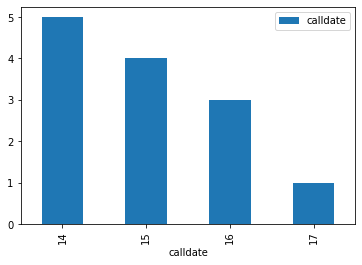

In [178]:
answered_sent_cdr[['calldate']].groupby(answered_sent_cdr["calldate"].dt.hour+gmt).count().plot(kind="bar")

In [179]:
unanswered_sent_cdr = cdr.loc[cdr['disposition'] == 'NO ANSWER']
unanswered_sent_cdr = unanswered_sent_cdr.loc[unanswered_sent_cdr['dcontext'] == 'from-internal']
unanswered_sent_cdr['origin'] = unanswered_sent_cdr['channel2']
unanswered_sent_cdr['destination'] = unanswered_sent_cdr['dst']
unanswered_sent_cdr = unanswered_sent_cdr.reset_index()
unanswered_sent_cdr.head()

,calldate,clid,src,dst,dcontext,channel,dstchannel,lastapp,lastdata,duration,billsec,disposition,amaflags,accountcode,uniqueid,userfield,channel2,dstchannel2,origin,destination
0,2020-11-18 19:17:05,""""" <333333333>",333333333,123123123,from-internal,SIP/1020-00001261,SIP/gvt-vox-00001262,Dial,"SIP/gvt-vox/123123123,300,Tb(func-apply-siphea...",27,0,NO ANSWER,3,NaN,1.605727e+09,NaN,1020,gvt-,1020,123123123
1,2020-11-18 19:12:03,""""" <333333333>",333333333,343424232432,from-internal,SIP/1011-0000125d,SIP/gvt-vox-0000125e,Dial,"SIP/gvt-vox/0343424232432,300,Tb(func-apply-si...",25,0,NO ANSWER,3,NaN,1.605727e+09,NaN,1011,gvt-,1011,343424232432
2,2020-11-18 19:11:25,""""" <333333333>",333333333,312331232133,from-internal,SIP/1011-0000125b,SIP/gvt-vox-0000125c,Dial,"SIP/gvt-vox/015312331232133,300,Tb(func-apply-...",25,0,NO ANSWER,3,NaN,1.605727e+09,NaN,1011,gvt-,1011,312331232133
3,2020-11-18 18:41:32,""""" <333333333>",333333333,24234343434,from-internal,SIP/1027-00001253,SIP/gvt-vox-00001254,Dial,"SIP/gvt-vox/01524234343434,300,Tb(func-apply-s...",6,0,NO ANSWER,3,NaN,1.605725e+09,NaN,1027,gvt-,1027,24234343434
4,2020-11-18 18:41:23,""""" <333333333>",333333333,24234343434,from-internal,SIP/1027-00001251,SIP/gvt-vox-00001252,Dial,"SIP/gvt-vox/01524234343434,300,Tb(func-apply-s...",6,0,NO ANSWER,3,NaN,1.605725e+09,NaN,1027,gvt-,1027,24234343434


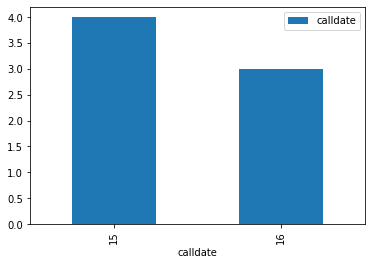

In [180]:
unanswered_sent_cdr[['calldate']].groupby(unanswered_sent_cdr["calldate"].dt.hour+gmt).count().plot(kind="bar")

In [181]:
answered_recv_cdr = cdr.loc[cdr['disposition'] == 'ANSWERED']
answered_recv_cdr = answered_recv_cdr.loc[answered_recv_cdr['dcontext'] == 'ext-group']
answered_recv_cdr['origin'] = answered_recv_cdr['src']
answered_recv_cdr['destination'] = answered_recv_cdr['dstchannel2']
answered_recv_cdr = answered_recv_cdr.reset_index()
answered_recv_cdr.head()

,calldate,clid,src,dst,dcontext,channel,dstchannel,lastapp,lastdata,duration,billsec,disposition,amaflags,accountcode,uniqueid,userfield,channel2,dstchannel2,origin,destination
0,2020-11-18 18:20:33,"""224422411144"" <224422411144>",224422411144,1111,ext-group,SIP/333333333-0000124c,SIP/1011-0000124e,Dial,"SIP/1000&SIP/1011&SIP/1013,60,HhtrM(auto-blkvm...",80,70,ANSWERED,3,NaN,1.605724e+09,NaN,3333,1011,224422411144,1011


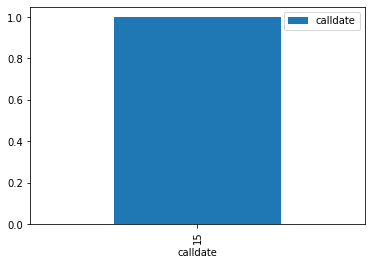

In [182]:
answered_recv_cdr[['calldate']].groupby(answered_recv_cdr["calldate"].dt.hour+gmt).count().plot(kind="bar")

In [183]:
unanswered_recv_cdr = cdr.loc[cdr['disposition'] == 'NO ANSWER']
unanswered_recv_cdr = unanswered_recv_cdr.loc[unanswered_recv_cdr['dcontext'] == 'ext-group']
unanswered_recv_cdr['origin'] = unanswered_recv_cdr['src']
unanswered_recv_cdr['destination'] = unanswered_recv_cdr['dstchannel2']
unanswered_recv_cdr = unanswered_recv_cdr.reset_index()
unanswered_recv_cdr.head(5)

,calldate,clid,src,dst,dcontext,channel,dstchannel,lastapp,lastdata,duration,billsec,disposition,amaflags,accountcode,uniqueid,userfield,channel2,dstchannel2,origin,destination
0,2020-11-18 21:11:10,"""22222222222"" <22222222222>",22222222222,1111,ext-group,SIP/333333333-0000126b,SIP/1000-0000126c,Dial,"SIP/1000&SIP/1011&SIP/1013,60,HhtrM(auto-blkvm...",51,0,NO ANSWER,3,NaN,1.605734e+09,NaN,3333,1000,22222222222,1000
1,2020-11-18 21:09:30,"""22222222222"" <22222222222>",22222222222,1111,ext-group,SIP/333333333-00001269,SIP/1000-0000126a,Dial,"SIP/1000&SIP/1011&SIP/1013,60,HhtrM(auto-blkvm...",52,0,NO ANSWER,3,NaN,1.605734e+09,NaN,3333,1000,22222222222,1000
2,2020-11-18 18:20:33,"""224422411144"" <224422411144>",224422411144,1111,ext-group,SIP/333333333-0000124c,SIP/1000-0000124d,Dial,"SIP/1000&SIP/1011&SIP/1013,60,HhtrM(auto-blkvm...",10,0,NO ANSWER,3,NaN,1.605724e+09,NaN,3333,1000,224422411144,1000
3,2020-11-18 18:11:27,"""224422411144"" <224422411144>",224422411144,1111,ext-group,SIP/333333333-0000124a,SIP/1000-0000124b,Dial,"SIP/1000&SIP/1011&SIP/1013,60,HhtrM(auto-blkvm...",48,0,NO ANSWER,3,NaN,1.605723e+09,NaN,3333,1000,224422411144,1000
4,2020-11-18 17:42:57,"""53252352555"" <53252352555>",53252352555,1111,ext-group,SIP/333333333-0000123d,SIP/1000-0000123e,Dial,"SIP/1000&SIP/1011&SIP/1013,60,HhtrM(auto-blkvm...",60,0,NO ANSWER,3,NaN,1.605721e+09,NaN,3333,1000,53252352555,1000


#### Remove answered by another extension on the same group

In [184]:
# s = pd.merge(unanswered_recv_cdr, answered_recv_cdr, indicator=True, how='outer')
print(len(unanswered_recv_cdr))
unanswered_recv_cdr = unanswered_recv_cdr[~unanswered_recv_cdr.calldate.isin(answered_recv_cdr.calldate)]
print(len(unanswered_recv_cdr))
unanswered_recv_cdr = unanswered_recv_cdr.drop_duplicates(subset='calldate', keep='first', inplace=False)
print(len(unanswered_recv_cdr))
unanswered_recv_cdr.head(5)

8
7
7


,calldate,clid,src,dst,dcontext,channel,dstchannel,lastapp,lastdata,duration,billsec,disposition,amaflags,accountcode,uniqueid,userfield,channel2,dstchannel2,origin,destination
0,2020-11-18 21:11:10,"""22222222222"" <22222222222>",22222222222,1111,ext-group,SIP/333333333-0000126b,SIP/1000-0000126c,Dial,"SIP/1000&SIP/1011&SIP/1013,60,HhtrM(auto-blkvm...",51,0,NO ANSWER,3,NaN,1.605734e+09,NaN,3333,1000,22222222222,1000
1,2020-11-18 21:09:30,"""22222222222"" <22222222222>",22222222222,1111,ext-group,SIP/333333333-00001269,SIP/1000-0000126a,Dial,"SIP/1000&SIP/1011&SIP/1013,60,HhtrM(auto-blkvm...",52,0,NO ANSWER,3,NaN,1.605734e+09,NaN,3333,1000,22222222222,1000
3,2020-11-18 18:11:27,"""224422411144"" <224422411144>",224422411144,1111,ext-group,SIP/333333333-0000124a,SIP/1000-0000124b,Dial,"SIP/1000&SIP/1011&SIP/1013,60,HhtrM(auto-blkvm...",48,0,NO ANSWER,3,NaN,1.605723e+09,NaN,3333,1000,224422411144,1000
4,2020-11-18 17:42:57,"""53252352555"" <53252352555>",53252352555,1111,ext-group,SIP/333333333-0000123d,SIP/1000-0000123e,Dial,"SIP/1000&SIP/1011&SIP/1013,60,HhtrM(auto-blkvm...",60,0,NO ANSWER,3,NaN,1.605721e+09,NaN,3333,1000,53252352555,1000
5,2020-11-18 17:35:59,"""53252352555"" <53252352555>",53252352555,1111,ext-group,SIP/333333333-0000123b,SIP/1000-0000123c,Dial,"SIP/1000&SIP/1011&SIP/1013,60,HhtrM(auto-blkvm...",49,0,NO ANSWER,3,NaN,1.605721e+09,NaN,3333,1000,53252352555,1000


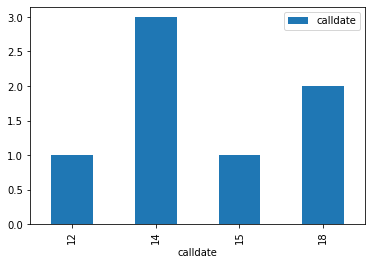

In [185]:
unanswered_recv_cdr[['calldate']].groupby(unanswered_recv_cdr["calldate"].dt.hour+gmt).count().plot(kind="bar")

Recv answer ratio per hour


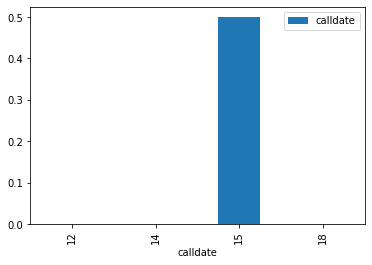

In [186]:
print('Recv answer ratio per hour')
ar = answered_recv_cdr
ur = unanswered_recv_cdr
a = ar[['calldate']].groupby(ar["calldate"].dt.hour+gmt).count()
u = ur[['calldate']].groupby(ur["calldate"].dt.hour+gmt).count()
(a/(u+a)).plot(kind="bar")

In [187]:
period_total_time = (cdr.index.max()-cdr.index.min()).total_seconds()
period_work_time = period_total_time * (5/7) * (8/24)
period_work_time

5265.952380952381

In [188]:
period_work_days = period_work_time/(8*60*60)
period_work_days

0.18284556878306876

## Answered calls count

In [189]:
answered_calls_count = answered_sent_cdr['src'].count() + answered_recv_cdr['src'].count()
answered_calls_count

14

In [190]:
calls_per_day = answered_calls_count/period_work_days
calls_per_day

76.56734638513362

## Answered calls sent

In [191]:
answered_calls_sent = answered_sent_cdr['origin'].count()
answered_calls_sent

13

In [192]:
answered_calls_sent/period_work_days

71.09825021476694

In [193]:
answered_sent_cdr['origin'].count()/(unanswered_sent_cdr['origin'].count()+answered_sent_cdr['origin'].count())

0.65

## Unanswered calls sent

In [194]:
unanswered_sent_cdr['origin'].count()

7

In [195]:
unanswered_calls_sent = unanswered_sent_cdr['origin'].count()
unanswered_calls_sent/period_work_days

38.28367319256681

## Answered calls received

In [196]:
answered_calls_recv = answered_recv_cdr['destination'].count()
answered_calls_recv

1

In [197]:
answered_calls_recv/period_work_days

5.4690961703666865

## Unanswered calls received

In [198]:
unanswered_recv_cdr['destination'].count()

7

In [199]:
unanswered_recv_cdr['destination']

0    1000
1    1000
3    1000
4    1000
5    1000
6    1000
7    1000
Name: destination, dtype: object

In [200]:
unanswered_recv_cdr['destination'].count()/(answered_recv_cdr['destination'].count() + unanswered_recv_cdr['destination'].count())

0.875

## Extensions that made most calls

In [201]:
s1 = answered_sent_cdr[['origin','destination']].groupby(['origin']).count()
s1 = s1.sort_values(by='destination', ascending=False)
s1.head(10)

,destination
origin,
1027,7
1010,3
1020,3


In [202]:
s2 = unanswered_sent_cdr[['origin','destination']].groupby(['origin']).count()+s1
s2 = s2.sort_values(by='destination', ascending=False)
s2.head(10)

,destination
origin,
1027,11.0
1020,4.0
1010,NaN
1011,NaN


### Most called numbers

In [213]:
s = answered_sent_cdr[['origin','destination']].groupby(['destination']).count()
s = s.sort_values(by='origin', ascending=False)
s.head(10)

,origin
destination,
5522552255,2
53252352555,2
2234234,1
44224422,1
53453434,1
2323423423,1
4234342424,1
6455456654,1
11121212121,1


### Numbers that made most incoming calls

In [214]:
s = answered_recv_cdr[['origin','destination']].groupby(['origin']).count()
s = s.sort_values(by='destination', ascending=False)
s.head(10)

,destination
origin,
224422411144,1


### Time to pickup incoming calls

In [215]:
t = answered_recv_cdr['duration'] - answered_recv_cdr['billsec']
t.to_frame().mean()

0    10.0
dtype: float64

### Time for outgoing calls to be pickup

In [216]:
t = answered_sent_cdr['duration'] - answered_recv_cdr['billsec']
t.to_frame().mean()

0    310.0
dtype: float64

### Time talking time per received call

In [217]:
answered_recv_cdr['billsec'].to_frame().describe()

,billsec
count,1.0
mean,70.0
std,NaN
min,70.0
25%,70.0
50%,70.0
75%,70.0
max,70.0


### Ratio of work time on active calls

In [218]:
total_duration = answered_sent_cdr['duration'].sum() + answered_recv_cdr['duration'].sum()
total_duration

3589

In [219]:
total_duration/period_work_time

0.6815481303974319

### Extension spending most time on calls

#### Seconds

In [220]:
top_ext_time_sent = answered_sent_cdr[['origin','duration']].groupby(['origin']).sum()
top_ext_time_recv = answered_recv_cdr[['destination','duration']].groupby(['destination']).sum()
top_ext_time = top_ext_time_recv + top_ext_time_sent
top_ext_time = top_ext_time.sort_values('duration', ascending=False)
top_ext_time.head(10)

,duration
1010,NaN
1011,NaN
1020,NaN
1027,NaN


#### Work time perc

In [221]:
top_ext_time_perc = top_ext_time/period_work_time
top_ext_time_perc.head(10)

,duration
1010,NaN
1011,NaN
1020,NaN
1027,NaN


### Number spending most time in calls

In [222]:
top_number_time_sent = answered_sent_cdr[['destination','duration']].groupby(['destination']).sum()
top_number_time_recv = answered_recv_cdr[['origin','duration']].groupby(['origin']).sum()
top_number_time = top_number_time_recv + top_number_time_sent
top_number_time = top_number_time.sort_values('duration', ascending=False)
top_number_time.head(10)

,duration
2234234,NaN
44224422,NaN
53453434,NaN
2323423423,NaN
4234342424,NaN
5522552255,NaN
6455456654,NaN
11121212121,NaN
22244422244,NaN
34254534555,NaN
